### The German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [2]:
# !wget -c http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
# !unzip FullIJCNN2013.zip

In [3]:
import numpy as np
import cv2

# Change height and size

IMG_HEIGHT = 600
SIGN_SIZE = (112, 112)

# Function for reading the images
def readImages(rootpath, file_path, images_range, minclasses):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    elements = [np.asarray([i,0]) for i in range(0,43)]
    ground_truth = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    files_truth = [ground_truth[i][0] for i in range(0,len(ground_truth))]
    for num in images_range:
        if np.min([elements[i][1] for i in range(0,43)])>=minclasses:
            break
        file = "{:05d}".format(num) + '.ppm'
        print(file)
        filename = rootpath + '/' + file
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)
        


        img = img_resized
        for j in [i for i, x in enumerate(files_truth) if x == file]:

            bbox = np.asarray([int(ground_truth[j][1])*scale,\
                               int(ground_truth[j][2])*scale,\
                               int(ground_truth[j][3])*scale,\
                               int(ground_truth[j][4])*scale])
            label = int(ground_truth[j][5])
            if elements[label][1]<minclasses:
                # Añado el original
                sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
                sign_resized = cv2.resize(sign,SIGN_SIZE)
                files.append(filename)
                signs.append(sign_resized)
                bboxes.append(bbox[0:4])
                labels.append(label)

                elements[label][1] = elements[label][1] + 1

                if label in [0,21,27,29,32,39,40,41,42]:
                    loop = range(0,int(minclasses/25))
                elif label in [19,24,31,37]:
                    loop = range(0,int(minclasses/9))
                elif label in [15,20,22,23,25,28,33,34,36]:
                    loop = range(0,int(minclasses/75))       
                elif label in [16]:
                    loop = range(0,int(minclasses/40))                        
                elif label in [6,26,30,35]:
                    loop = range(0,int(minclasses/100))                       
                else:
                    loop = range(0,int(minclasses/150))

                for i in loop:
                    if elements[label][1]>=minclasses:
                        break
                    mov1 = np.random.randint(max(1,np.around((int(bbox[2])-int(bbox[0]))*0.2)),size=1)
                    mov2 = np.random.randint(max(1,np.around((int(bbox[3])-int(bbox[1]))*0.2)),size=1)

                    b1 = int((int(bbox[0]) + mov1))
                    b2 = int((int(bbox[1]) + mov2))
                    b3 = int((int(bbox[2]) + mov1))
                    b4 = int((int(bbox[3]) + mov2))

                    m_b1 = int((int(bbox[0]) - mov1))
                    m_b2 = int((int(bbox[1]) - mov2))
                    m_b3 = int((int(bbox[2]) - mov1))
                    m_b4 = int((int(bbox[3]) - mov2))

                    p_b1 = int(bbox[0])
                    p_b2 = int(bbox[1])
                    p_b3 = int(bbox[2])
                    p_b4 = int(bbox[3])

                    # Translaciones
                    # Arriba derecha
                    sign = img[b2:b4, b1:b3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b1, b2, b3, b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Abajo izquierda
                    sign = img[m_b2:m_b4, m_b1:m_b3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([m_b1, m_b2, m_b3, m_b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Arriba
                    sign = img[b2:b4, p_b1:p_b3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([p_b1, b2, p_b3, b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Derecha
                    sign = img[p_b2:p_b4, b1:b3]    
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b1, p_b2, b3, p_b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Arriba izquierda
                    sign = img[b2:b4, m_b1:m_b3]
                    if sign.shape[0]>0 and sign.shape[1]>0: 
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b1, b2, b3, b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Abajo derecha
                    sign = img[m_b2:m_b4, b1:b3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([m_b1, m_b2, m_b3, m_b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Abajo
                    sign = img[m_b2:m_b4, p_b1:p_b3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([p_b1, b2, p_b3, b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    # Izquierda
                    sign = img[p_b2:p_b4, m_b1:m_b3] 
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b1, p_b2, b3, p_b4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1


                    #Trial of Zoom
                    b_1 = int((int(bbox[0]) - mov1))
                    b_2 = int((int(bbox[1]) - mov2))
                    b_3 = int((int(bbox[2]) + mov1))
                    b_4 = int((int(bbox[3]) + mov2))

                    sign = img[b_2:b_4, b_1:b_3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b_1, b_2, b_3, b_4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)
                        elements[label][1] = elements[label][1] + 1

                    b_1 = int((int(bbox[0]) + mov1))
                    b_2 = int((int(bbox[1]) + mov2))
                    b_3 = int((int(bbox[2]) - mov1))
                    b_4 = int((int(bbox[3]) - mov2))

                    sign = img[b_2:b_4, b_1:b_3]
                    if sign.shape[0]>0 and sign.shape[1]>0:
                        sign_resized = cv2.resize(sign, SIGN_SIZE)
                        bbox_end = np.array([b_1, b_2, b_3, b_4]) 
                        files.append(filename)
                        signs.append(sign_resized)
                        bboxes.append(bbox_end)  
                        labels.append(label)  
                        elements[label][1] = elements[label][1] + 1

                
            
    return images, files, signs, bboxes, labels

In [4]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', '01_Bboxes_Generated/00_20190509_224_224_05/', range(0,600), 600)
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013','01_Bboxes_Generated/00_20190509_224_224_05/', range(600,900), 600)

00000.ppm
00001.ppm
00002.ppm
00003.ppm
00004.ppm
00005.ppm
00006.ppm
00007.ppm
00008.ppm
00009.ppm
00010.ppm
00011.ppm
00012.ppm
00013.ppm
00014.ppm
00015.ppm
00016.ppm
00017.ppm
00018.ppm
00019.ppm
00020.ppm
00021.ppm
00022.ppm
00023.ppm
00024.ppm
00025.ppm
00026.ppm
00027.ppm
00028.ppm
00029.ppm
00030.ppm
00031.ppm
00032.ppm
00033.ppm
00034.ppm
00035.ppm
00036.ppm
00037.ppm
00038.ppm
00039.ppm
00040.ppm
00041.ppm
00042.ppm
00043.ppm
00044.ppm
00045.ppm
00046.ppm
00047.ppm
00048.ppm
00049.ppm
00050.ppm
00051.ppm
00052.ppm
00053.ppm
00054.ppm
00055.ppm
00056.ppm
00057.ppm
00058.ppm
00059.ppm
00060.ppm
00061.ppm
00062.ppm
00063.ppm
00064.ppm
00065.ppm
00066.ppm
00067.ppm
00068.ppm
00069.ppm
00070.ppm
00071.ppm
00072.ppm
00073.ppm
00074.ppm
00075.ppm
00076.ppm
00077.ppm
00078.ppm
00079.ppm
00080.ppm
00081.ppm
00082.ppm
00083.ppm
00084.ppm
00085.ppm
00086.ppm
00087.ppm
00088.ppm
00089.ppm
00090.ppm
00091.ppm
00092.ppm
00093.ppm
00094.ppm
00095.ppm
00096.ppm
00097.ppm
00098.ppm
00099.ppm


00877.ppm
00878.ppm
00879.ppm
00880.ppm
00881.ppm
00882.ppm
00883.ppm
00884.ppm
00885.ppm
00886.ppm
00887.ppm
00888.ppm
00889.ppm
00890.ppm
00891.ppm
00892.ppm
00893.ppm
00894.ppm
00895.ppm
00896.ppm
00897.ppm
00898.ppm
00899.ppm


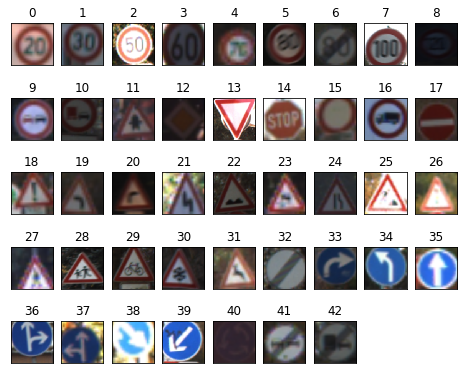

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
#Guardo signals para el siguiente modelos
prds_ofs = open('02_Yes_Labels/Bboxes_2.txt', 'w')

for i in range(0,len(train_labels)):
    prds_ofs.write(str(train_files[i][-9::]) + ';' + \
               str(int(train_bboxes[i][0])) + ';' + \
               str(int(train_bboxes[i][1])) + ';' + \
               str(int(train_bboxes[i][2])) + ';' + \
               str(int(train_bboxes[i][3])) + '\n')
for i in range(0,len(test_labels)):
    prds_ofs.write(str(test_files[i][-9::]) +';' + \
               str(int(test_bboxes[i][0])) + ';' + \
               str(int(test_bboxes[i][1])) + ';' + \
               str(int(test_bboxes[i][2])) + ';' + \
               str(int(test_bboxes[i][3])) + '\n')
prds_ofs.close()

In [7]:
# import matplotlib.pyplot as plt
# %matplotlib inline 

# # Show examples from each class
# class_names_test = np.unique(test_labels)
# num_classes_test = len(class_names_test)
# fig = plt.figure(figsize=(8,8))
# for i in range(num_classes_test):
#     ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
#     ax.set_title(class_names_test[i])
#     indices = np.where(np.isin(test_labels, class_names_test[i]))[0]
#     plt.imshow(cv2.cvtColor(test_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
# plt.show()

In [8]:
# class_names = np.unique(train_labels)
# num_classes = len(class_names)
# fig = plt.figure(figsize=(8,8))
# for idx in [i for i, x in enumerate(train_labels) if x == 31]:
#     plt.imshow(cv2.cvtColor(train_signs[idx], cv2.COLOR_BGR2RGB))
#     plt.show()

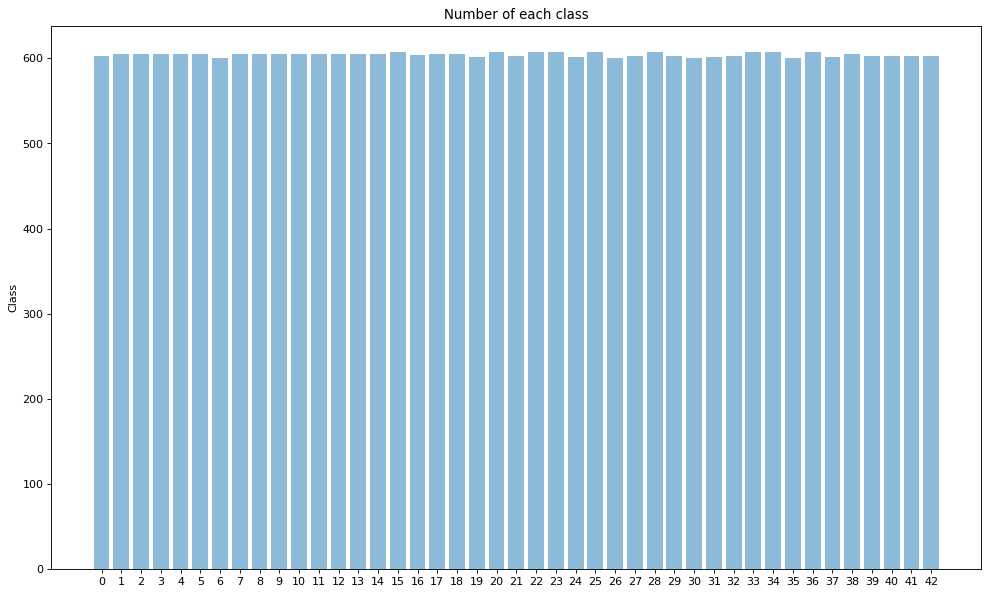

In [9]:
unique, counts = np.unique(train_labels, return_counts=True)

plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(unique))

plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Class')
plt.title('Number of each class')
 
plt.show()

In [10]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow import get_default_session

# get_default_session.close()
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
session.as_default()

from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
train_size = int(len(train_signs)*0.8)
# Data pre-processing
tr_signs = np.array(train_signs)[0:train_size]
tr_labels = np.array(train_labels)[0:train_size]
va_signs = np.array(train_signs)[train_size:len(train_signs)]
va_labels = np.array(train_labels)[train_size:len(train_signs)]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

In [11]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## Assignment 3.3: Transfer learning

In [12]:
from keras.applications.xception import Xception
from keras.layers import Dense, GlobalMaxPooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam

baseline = Xception(include_top=False, weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

x = GlobalMaxPooling2D()(baseline.layers[-2].output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=baseline.input, outputs=predictions)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'GlobalAveragePooling2D' is not defined

In [9]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, Callback

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.t_loss = []
        self.t_acc = []

    def on_epoch_end(self, epoch, logs):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        logs['test_loss'] = loss
        logs['test_acc'] = acc
        print('\nT_loss: {}, T_acc: {}\n'.format(loss, acc))

# tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## <font color='red'> CHANGE THIS FOR SAVE NEW MODELS </font>

In [10]:
callbacks = [ModelCheckpoint(filepath='Xception_model_0.h5', monitor='val_loss', save_best_only=True),
             TensorBoard(log_dir='logs/{}'.format(time())),
             TestCallback((te_signs, te_labels))]

In [12]:
te_labels.shape

(10051, 43)

In [13]:
# train_steps = int(len(tr_signs) / 16)
# valid_steps = int(len(va_signs) / 16)

data = model.fit(tr_signs, tr_labels, batch_size=6, epochs=1, validation_data=(va_signs, va_labels), verbose=1, callbacks=callbacks)
start = time()
loss, acc = model.evaluate(te_signs, te_labels, verbose=0)
end = time()

print('Xception (without Data Augmentation) took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 20789 samples, validate on 5198 samples
Epoch 1/1
20789/20789 [==============================] - 740s 36ms/step - loss: 0.3509 - acc: 0.9655 - val_loss: 0.0758 - val_acc: 0.9927

T_loss: 0.5761179393068294, T_acc: 0.9405465288035451

Xception (without Data Augmentation) took 93.47645211219788 seconds
Test loss: 0.5761179393068294 - Accuracy: 0.9405465288035451


In [15]:
## We load our model
from keras.models import load_model
model2 = load_model('Xception_model_0.h5')

loss, acc = model2.evaluate(te_signs, te_labels,batch_size=4, verbose=0)
# print('Xception (without Data Augmentation) took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Test loss: 0.32681244620887473 - Accuracy: 0.9644263909404235
